# Lab 2: Data Preprocessing

In this assignment, we will learn how to explore the raw data and preprocess it. 

The dataset we are going to exlore is an insurance data. It provides different features of each user as follows:
* age: age of the user
* smoker: gender of the user
* bmi: body mass index, providing an understanding of body
* children: number of children covered by health insurance / number of dependents
* smoker: smoker or not
* region: the user's residential area in the US, northeast, southeast, southwest, northwest.

Additionally, the medical cost of each user is also provided: 
* charges: the medical cost 

Please follow Lecture 5_data_understanding and Lecture 6_data_preprocessing to complete following questions. 

### Q1. Load data with Pandas and output the basic information of this dataset, such as the features and their data types.  Which features are numerical features and which users are categorical features?


In [56]:
# your code
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np
df = pd.read_csv("insurance.csv")
df.info()
# categorical features are smoker, smoker, and region
# numerical features are age, bmi, children, and charges

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Q2. Check whether there are missing values in this dataset.

In [57]:
# your code
print(df.shape)

df.isnull().sum()

# no missing values

(1338, 7)


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Q3. Visualize all numerical features with histogram plot to see the distribution of each numerical feature. 


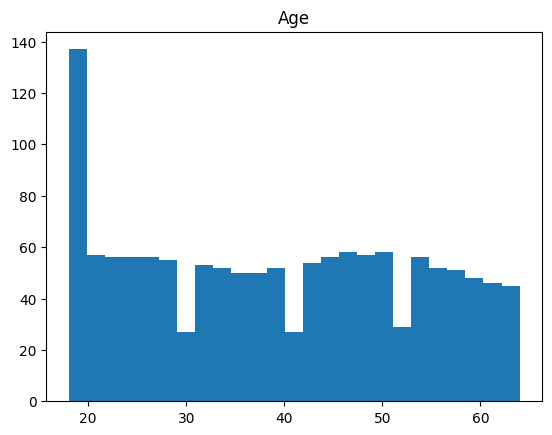

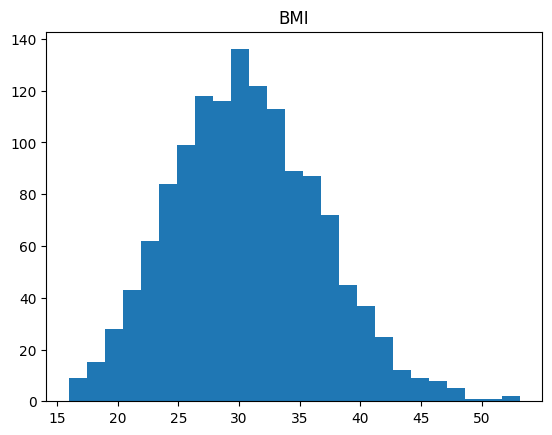

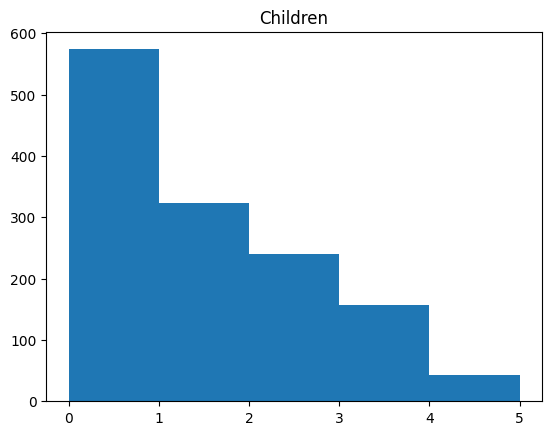

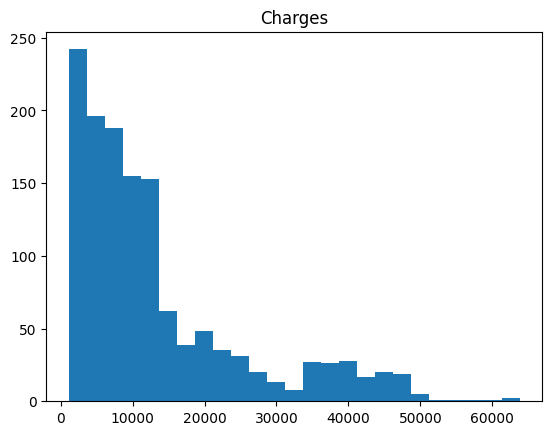

In [58]:
# your code
# numerical features are age, bmi, children, and charges
plt.hist(df['age'], bins = 25)
plt.title("Age")
plt.show()

plt.hist(df['bmi'], bins = 25)
plt.title("BMI")
plt.show()

plt.hist(df['children'], bins = 5)
plt.title("Children")
plt.show()

plt.hist(df['charges'], bins = 25)
plt.title("Charges")
plt.show()

### Q4. Use corr() function of Pandas to show the correlation between different numerical features

In [59]:
# your code
corr = df[['age', 'bmi', 'children', 'charges']].corr()
corr.style.background_gradient()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


### Q5. For all categorical features, use bar plot to visualize the number of users within each category.

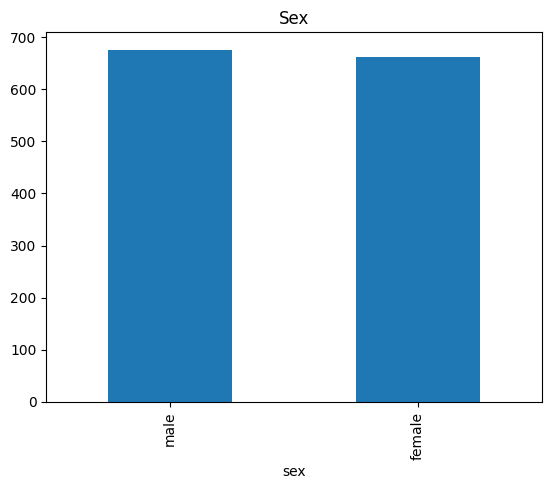

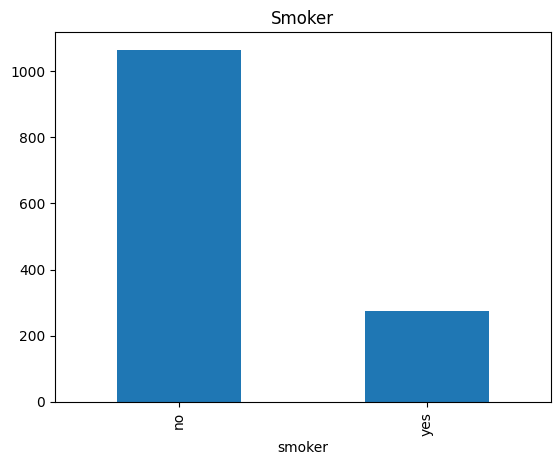

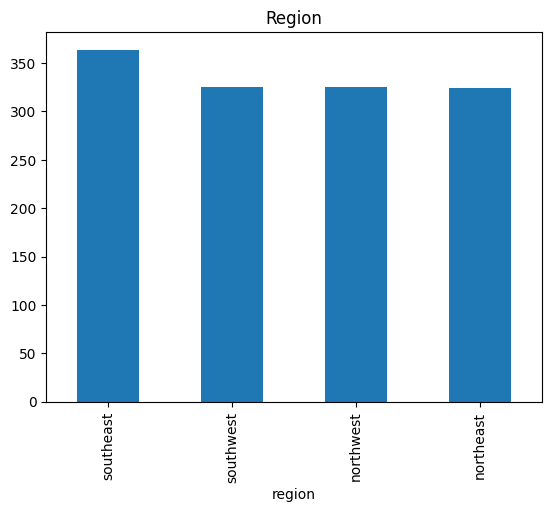

In [60]:
# your code
# categorical features are sex, smoker, and region
df['sex'].value_counts().plot(kind='bar')
plt.title('Sex')
plt.show()

df['smoker'].value_counts().plot(kind='bar')
plt.title('Smoker')
plt.show()

df['region'].value_counts().plot(kind='bar')
plt.title('Region')
plt.show()

### Q6. Convert all categorical features into numerical features with Label Encoding or One-Hot Encoding

In [61]:
# your code
# categorical features are sex, smoker, and region

le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
print(df['sex'].value_counts())

df['smoker'] = le.fit_transform(df['smoker'])
print(df['smoker'].value_counts())

df['region'] = le.fit_transform(df['region'])
print(df['region'].value_counts())

sex
1    676
0    662
Name: count, dtype: int64
smoker
0    1064
1     274
Name: count, dtype: int64
region
2    364
3    325
1    325
0    324
Name: count, dtype: int64


### Q7. Normalize all numerical features

In [62]:
# your code
# numerical features are age, bmi, children, and charges
age = df['age']
age_mean = np.mean(age, axis=0)
age_std = np.std(age, axis=0)
df['age'] = (age - age_mean)/age_std

bmi = df['bmi']
bmi_mean = np.mean(bmi, axis=0)
bmi_std = np.std(bmi, axis=0)
df['bmi'] = (bmi - bmi_mean)/bmi_std

children = df['children']
children_mean = np.mean(children, axis=0)
children_std = np.std(children, axis=0)
df['children'] = (children - children_mean)/children_std

charges = df['charges']
charges_mean = np.mean(charges, axis=0)
charges_std = np.std(charges, axis=0)
df['charges'] = (charges - charges_mean)/charges_std

### Q8. Save your preprocessed data into a csv file. Submit your code and the preprocessed data.

In [64]:
df.to_csv("./julia_fasick_lab02.csv", sep='\t', encoding='utf-8', index=False)